In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


#  `Matplotlib`

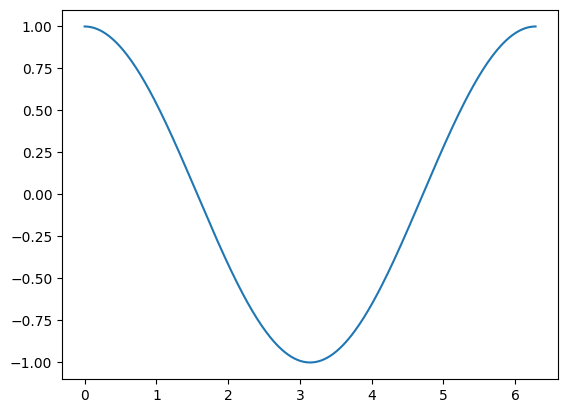

In [ ]:
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

plt.plot(xs, ys)

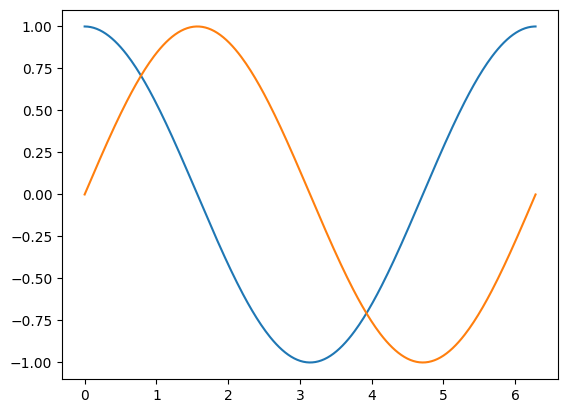

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))




Plotting two functions:
1. $y = cos(4x)$
2. $y = cos(x)$

In the interval: $[-\pi, +\pi]$


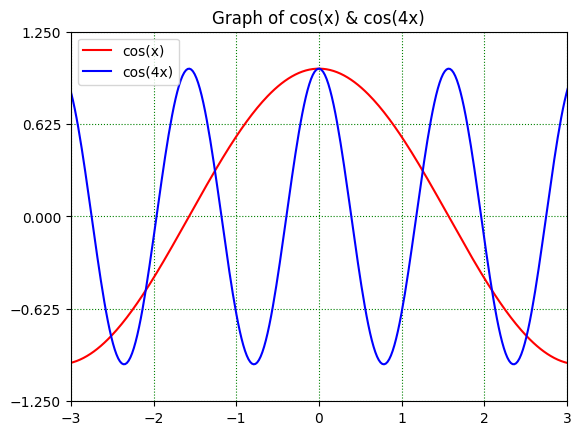

In [ ]:
xs = np.linspace(-np.pi, np.pi, 300)

plt.plot(xs, np.cos(xs), 'red', label='cos(x)', linewidth=1.5)

plt.plot(xs, np.cos(4*xs), 'blue', label='cos(4x)', linewidth=1.5)


plt.xticks(np.arange(-3, 4, 1))
plt.yticks(np.arange(-1.250, 1.251, 0.625))

plt.xlim([-3, 3])
plt.ylim([-1.250, 1.250])

plt.grid(True, which='both', axis='both', linestyle=':', color='green')

plt.title("Graph of cos(x) & cos(4x)")

plt.legend(loc='upper left')


#EDA of bikeshare trips

Performing some basic EDA (exploratory data analysis) on some Divvy trip data

The variables in this data frame are defined as:

- `ride_id`: Index of ride -- uniquely identifies each ride
- `rideable_type`: Type of bike used for ride (`electric_bike`/`classic_bike`/`docked_bike`)
- `started_at`: Date and time at the start of the ride
- `ended_at` : Date and time at the end of the ride
- `start_station_name`: Name of source station
- `start_station_id`: Id of source station
- `end_station_name`: Name of destination station
- `end_station_id`: Id of destination station
- `start_lat`: Latitude at the start of the ride
- `start_long`: Longitude at the start of the ride
- `end_lat`: Latitude at the end of the ride
- `end_long`: Longitude at the end of the ride
- `member_casual`: Type of rider (`member`-- with a divvy membership/`casual`)

In [ ]:
bike_trips = pd.read_csv('divvy_data.csv', usecols = ["rideable_type", 'started_at', 'ended_at', 'start_station_name', 'start_station_id',
                                                      'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                                                      'member_casual'])


bike_trips['started_at'] = pd.to_datetime(bike_trips['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_trips['ended_at'] = pd.to_datetime(bike_trips['ended_at'], format='%Y-%m-%d %H:%M:%S')

bike_trips.head()




,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [ ]:
start_of_range = bike_trips['started_at'].min()
end_of_range = bike_trips['started_at'].max()
uni_date = bike_trips['started_at'].dt.date.nunique()
print("No. of unique started dates:", uni_date)
print("Start of range",start_of_range)
print("End of range",end_of_range)
print(bike_trips.info())
print(bike_trips.describe())
print("Number of different types of bike",bike_trips['rideable_type'].value_counts())
print("No. of membersand casual",bike_trips['member_casual'].value_counts())



No. of unique started dates: 59
Start of range 2021-01-01 00:02:05
End of range 2021-02-28 23:59:41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146456 entries, 0 to 146455
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       146456 non-null  object        
 1   started_at          146456 non-null  datetime64[ns]
 2   ended_at            146456 non-null  datetime64[ns]
 3   start_station_name  133785 non-null  object        
 4   start_station_id    133785 non-null  object        
 5   end_station_name    130821 non-null  object        
 6   end_station_id      130821 non-null  object        
 7   start_lat           146456 non-null  float64       
 8   start_lng           146456 non-null  float64       
 9   end_lat             146139 non-null  float64       
 10  end_lng             146139 non-null  float64       
 11  member_casual       146456 non-null  object

## Using `pandas` to plot

Plotting the total number of rides vs. the start date.


In [ ]:
# This plot shows the number of rides against the start date)
rides_per_day = bike_trips.groupby(by=bike_trips['started_at'].dt.date).size().reset_index()
rides_per_day = rides_per_day.rename(columns={0:'count'})

rides_per_day

,started_at,count
0,2021-01-01,1068
1,2021-01-02,2275
2,2021-01-03,2383
3,2021-01-04,3209
4,2021-01-05,3845
5,2021-01-06,3884
6,2021-01-07,3880
7,2021-01-08,3867
8,2021-01-09,4961
9,2021-01-10,3303


<Axes: xlabel='started_at'>

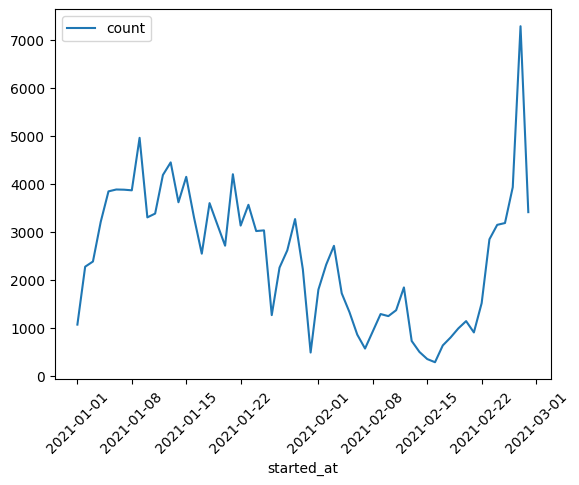

In [ ]:
rides_per_day.plot.line(x='started_at', y='count', rot=45)

## `seaborn`


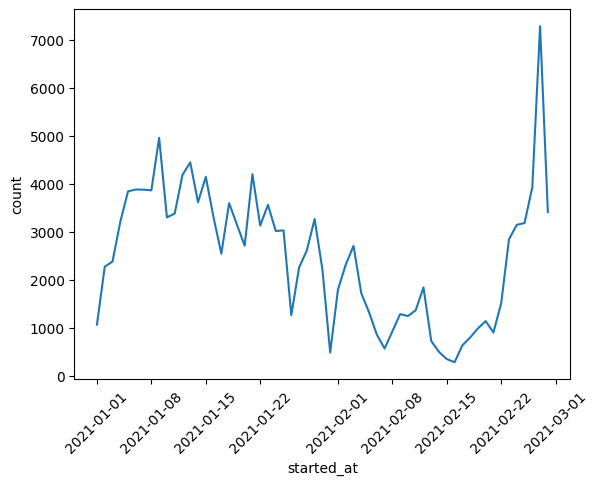

In [ ]:
axs = sns.lineplot(x="started_at", y="count", data=rides_per_day)
axs.tick_params(axis='x', rotation=45)




Useing seaborn's `barplot` function to make a bar chart showing the average
number of rides **started** by `member`s in the:
1. Morning (5:00 AM - 11:59 AM)
2. Afternoon (12:00 PM - 04:59 PM)
3. Evening (5:00 PM - 8:59 PM)
4. Night (9:00 PM - 4:59 AM)


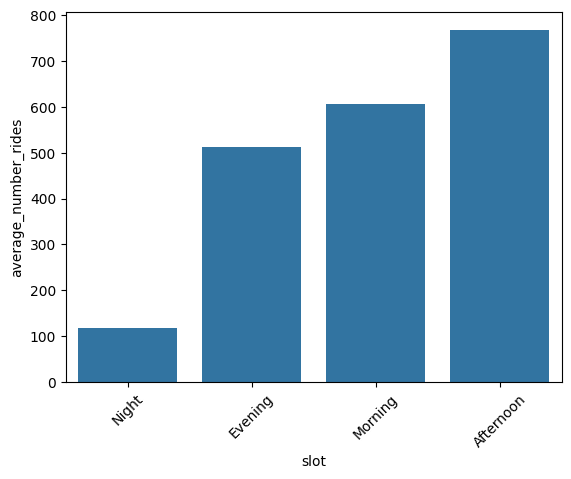

In [ ]:
def assign_slot(hour):

    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <=hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

bike_trips['slot'] = bike_trips['started_at'].dt.hour.apply(assign_slot)

bike_trips_member = bike_trips[bike_trips['member_casual'] == 'member']
daily_rides_slot = bike_trips_member.groupby([bike_trips_member['started_at'].dt.date, 'slot']).size().reset_index(name='number_of_rides')
average_rides_per_day = daily_rides_slot.groupby('slot')['number_of_rides'].mean().reset_index(name='average_number_rides')
average_rides_per_day = average_rides_per_day.sort_values(by='average_number_rides')

axs=sns.barplot(x='slot', y='average_number_rides',data=average_rides_per_day)
axs.tick_params(axis='x', rotation=45)





The afternoon has the highest average number of rides, whereas the night has the lowest average number of rides.

The amount of sunlight can be a plausible cause of this trend; more members may prefer riding during bright daylight.

Another possible reason could be safety; biking during the daytime can be safer compared to riding at night.

###Visualizing the distribution of total number of divvy rides by `member`s on any given day from our `bike_trips` dataframe.


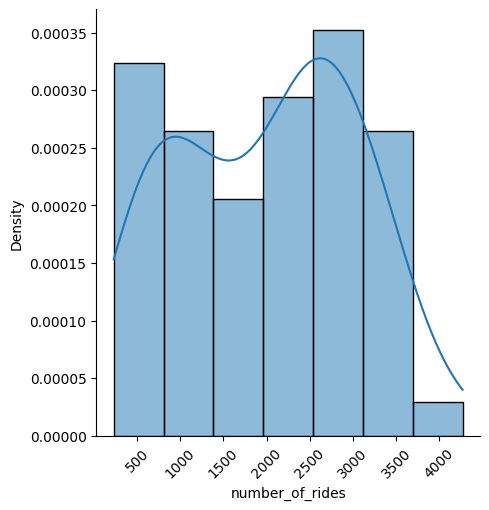

In [ ]:
bike_trips_member = bike_trips[bike_trips['member_casual'] == 'member']
bike_day_data = bike_trips_member.groupby(bike_trips_member['started_at'].dt.date).size().reset_index(name='number_of_rides')
axs = sns.displot(x='number_of_rides', kde=True, stat='density',data=bike_day_data)
axs.tick_params(axis='x', rotation=45)



Using`seaborn` to make side-by-side boxplots of total `electric_bike`, `classic_bike`, and `docked_bike` rides **started** on any given day in the dataframe.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


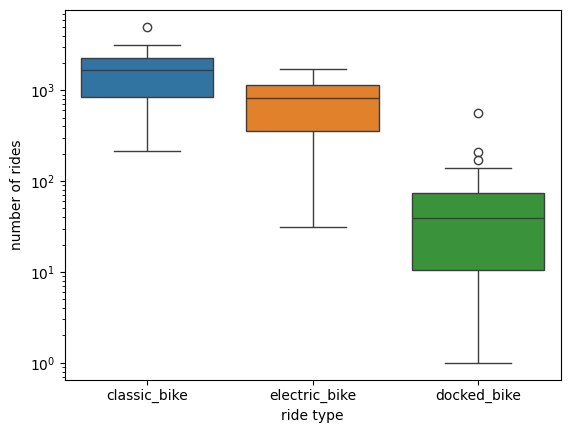

In [ ]:
ride_type_count = bike_trips.groupby([bike_trips['started_at'].dt.date, 'rideable_type']).size().reset_index(name='number_of_rides').sort_values(by='number_of_rides',ascending=False)
axs=sns.boxplot(data=ride_type_count, x='rideable_type', y='number_of_rides',hue='rideable_type')
axs.set_yscale('log')
axs.set_xlabel('ride type')
axs.set_ylabel('number of rides')
plt.show()


###Analyzing Member vs. Casual Riders Across Weekdays and Weekends

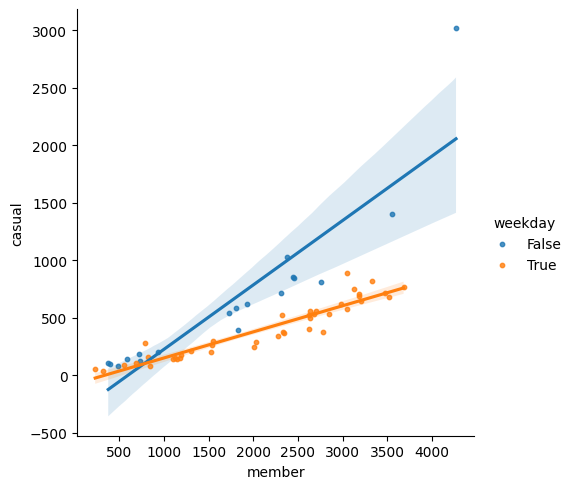

In [ ]:

temp_df = bike_trips[['started_at', 'member_casual']].copy()
temp_df['started_at'] = temp_df['started_at'].dt.date
temp_df = temp_df.rename(columns={'started_at':'start_date'})
temp_df['member'] = temp_df['member_casual'] == 'member'
temp_df['casual'] = temp_df['member_casual'] == 'casual'
temp_df = temp_df.drop(columns='member_casual')
temp_df = temp_df.groupby(['start_date']).sum().reset_index()

def day_type(day):
    if day in [5,6]:
        return False
    else:
        return True

temp_df['is_weekday'] = pd.to_datetime(temp_df['start_date']).dt.day_of_week.apply(day_type)
ax = sns.lmplot(data=temp_df, x='member', y='casual', hue='is_weekday',scatter_kws={'s': 10},legend=True)
legendObj = ax.legend
legendObj.set_title('weekday')
plt.show()

# Key Insights from Survey Data on Internet and Social Network Usage







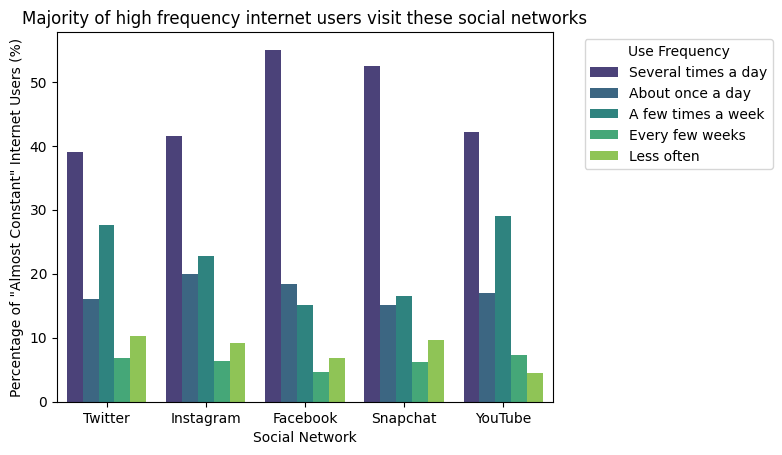

In [ ]:

survey = pd.read_csv('/content/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
column_names = survey.columns
#survey.info()
#print(survey.head())
#print(column_names)
#print(survey['intfreq'])
survey['intfreq'] = survey['intfreq'].astype(str)

filtered_data = survey[survey['intfreq'] == str(1)]
long_format = pd.melt(filtered_data,
                      id_vars=['respid', 'intfreq'],
                      value_vars=['sns2a','sns2b', 'sns2c', 'sns2d', 'sns2e'],
                      var_name='social_media',
                      value_name='Frequency')
long_format=long_format.drop(columns=['intfreq'])

long_format['social_media'].replace({'sns2a': 'Twitter','sns2b': 'Instagram','sns2c': 'Facebook','sns2d': 'Snapchat','sns2e': 'YouTube'}, inplace=True)
long_format['Frequency'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
long_format.dropna(inplace=True)
long_format

long_format_grouped=long_format.groupby(['social_media', 'Frequency']).size().reset_index(name='value')
long_format_grouped

long_format_grouped=long_format_grouped[long_format_grouped['Frequency'] <= str(5)]
long_format_grouped

grouped=long_format_grouped.groupby('social_media').agg(Total=('value', 'sum')).reset_index()
grouped

long_format_grouped=long_format_grouped.merge(grouped, on='social_media')
long_format_grouped

long_format_grouped['Percentage']=(long_format_grouped['value'] / long_format_grouped['Total']) * 100


labels = {
    '1': 'Several times a day',
    '2': 'About once a day',
    '3': 'A few times a week',
    '4': 'Every few weeks',
    '5': 'Less often'
}

long_format_grouped['Label']=long_format_grouped['Frequency'].map(labels)
long_format_grouped

network_order = [ 'Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']

sns.barplot(x='social_media', y='Percentage', hue='Label',order=network_order, data=long_format_grouped, palette='viridis')


plt.xlabel('Social Network' )
plt.ylabel('Percentage of "Almost Constant" Internet Users (%)' )
plt.title('Majority of high frequency internet users visit these social networks' )


plt.legend(title='Use Frequency', bbox_to_anchor=(1.05, 1))
plt.show()




## Descriptive Statistics and Hypothesis Formation from Survey Data


In [ ]:
data_survey = pd.read_csv('/content/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
print(data_survey.info())

numerical_columns = data_survey.select_dtypes(include=['number']).columns
categorical_columns = data_survey.select_dtypes(include=['object']).columns
data_survey_num = data_survey[numerical_columns]
data_survey_cat = data_survey[categorical_columns]
print(numerical_columns)
print(categorical_columns)

print(data_survey_num.head(), data_survey_cat.head())

missing_values = data_survey_cat.apply(lambda x: x.str.match(r'^\s*$').sum() )
print("Missing values in the data set",missing_values)
print(data_survey_cat.describe())

print(data_survey_num[['age']].describe())

data_inc=data_survey.copy()

income_median = {
    1: 5000,
    2: 15000,
    3: 25000,
    4: 35000,
    5: 45000,
    6: 62500,
    7: 87500,
    8: 125000,
    9: 150000,
    98: None,
    99: None
}

data_inc['income_map'] = data_inc['income'].map(income_median)
print(data_inc[['income_map']].describe())

sex_counts = data_survey['sex'].value_counts()
print("1: Male  2:Female",sex_counts)


gender = data_survey['gender'].value_counts()
print('Unique Values in gender',gender)

frequency = data_survey['intfreq'].value_counts()
print('Unique Values in intfreq',frequency)

party = data_survey['party'].value_counts()
print('Unique Values in party',party)

home_internet = data_survey['home4nw'].value_counts()
print('Unique Values in home_internet',home_internet)

mobile_int = data_survey['intmob'].value_counts()
print('Acess internet via Mobile',mobile_int)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   respid             1502 non-null   int64  
 1   sample             1502 non-null   int64  
 2   comp               1502 non-null   int64  
 3   int_date           1502 non-null   object 
 4   lang               1502 non-null   int64  
 5   state              1502 non-null   int64  
 6   density            1502 non-null   int64  
 7   usr                1502 non-null   object 
 8   qs1                1502 non-null   object 
 9   sex                1502 non-null   int64  
 10  eminuse            1502 non-null   int64  
 11  intmob             1502 non-null   int64  
 12  intfreq            1502 non-null   object 
 13  snsint2            1502 non-null   int64  
 14  home4nw            1502 non-null   int64  
 15  bbhome1            1502 non-null   object 
 16  bbhome2            1502 

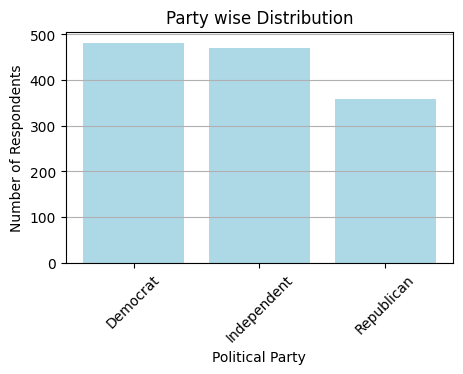

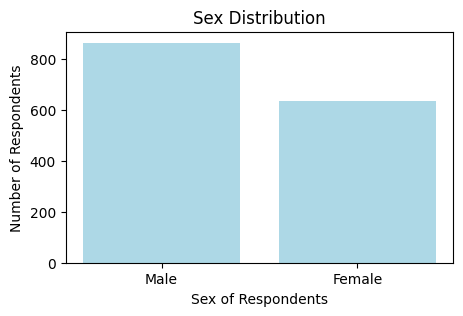

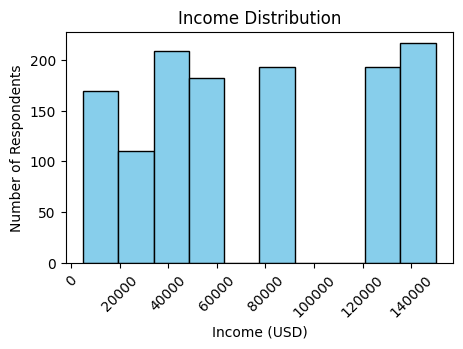

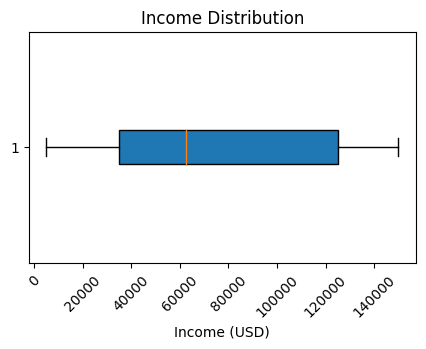

In [ ]:
data_party=data_survey.copy()
party_mapping = {
    1: 'Republican',
    2: 'Democrat',
    3: 'Independent'
}

data_party['party_mapped'] = data_party['party'].map(party_mapping)

party_counts_mapped=data_party['party_mapped'].value_counts()
plt.figure(figsize=(5, 3))

plt.bar(party_counts_mapped.index, party_counts_mapped.values,color='lightblue')
plt.title('Party wise Distribution')
plt.xlabel('Political Party')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
sex_mapped = data_survey['sex'].map({1: 'Male', 2: 'Female'})

sex_counts = sex_mapped.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sex_counts.index, sex_counts.values,color='lightblue')
plt.title('Sex Distribution')
plt.xlabel('Sex of Respondents')
plt.ylabel('Number of Respondents')

plt.show()
data_inc=data_survey.copy()

income_median = {
    1: 5000,
    2: 15000,
    3: 25000,
    4: 35000,
    5: 45000,
    6: 62500,
    7: 87500,
    8: 125000,
    9: 150000,
    98: None,
    99: None
}

data_inc['income_map'] = data_inc['income'].map(income_median)
plt.figure(figsize=(5, 3))
plt.hist(data_inc['income_map'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Income Distribution')
plt.xticks(rotation=45)

plt.xlabel('Income (USD)')
plt.ylabel('Number of Respondents')

plt.show()

plt.figure(figsize=(5, 3))

plt.boxplot(data_inc['income_map'].dropna(), vert=False, patch_artist=True )
plt.title('Income Distribution')
plt.xlabel('Income (USD)')
plt.xticks(rotation=45)

plt.show()


The dataset consists of both numerical (45 columns) and categorical (43 columns) variables, with a significant number of missing values ranging between 100 to 1500 entries. The mean age of respondents is approximately 53 years, with the minimum age at 18 and the median age at 55 years. Regarding income, individuals report earnings ranging from $5,000 to $150,000, with a mean income of $76,000 and a median of $62,500. Gender distribution is fairly balanced, with 854 males and 628 females. A larger proportion of respondents report frequent internet usage, with 744 individuals using it almost constantly. Political affiliations indicate that more respondents lean towards Democrats and Independents than Republicans. A significant number of individuals (1,288) have subscribed to home internet services, while 1,317 respondents access the internet via mobile phones. These insights suggest trends related to age, income, internet access, and political views, which can guide further exploration and analysis.








#Social Media Preferences Vary Significantly by Age Group

The bar chart reveals significant differences in social media platform preferences across three age groups: under 30, 30-50, and 50+. The younger population (under 30) shows a clear preference for platforms like Snapchat and Instagram, with higher usage rates compared to older age groups. In contrast, platforms such as YouTube and Facebook are more popular among individuals over 50, as these platforms attract a larger proportion of users in this demographic. The middle-aged group (30-50) demonstrates a more balanced usage across various platforms, unlike the distinct preferences observed in the younger and older populations.

These findings are based on the assumption that respondents accurately reported their social media usage and consistently use these platforms. The results suggest that younger generations favor short, visual content platforms like Instagram and Snapchat, while older generations prefer more long-form content platforms, such as YouTube and Facebook. This highlights the generational differences in content consumption and platform preferences.

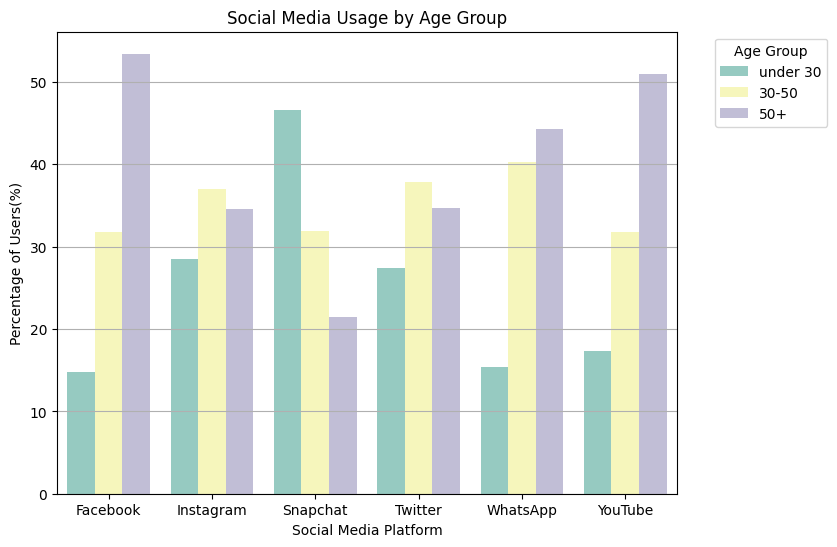

In [ ]:
data_social_media=data_survey[['respid','age', 'web1a', 'web1b', 'web1c', 'web1d', 'web1e' , 'web1f']]
#print(data_social_media)
long_format_data = pd.melt(data_social_media,
                      id_vars=['respid', 'age'],
                      value_vars=['web1a', 'web1b', 'web1c', 'web1d', 'web1e' , 'web1f'],
                      var_name='social_media',
                      value_name='Value')
filtered_social=long_format_data[long_format_data['Value'] ==1]
filtered_social=filtered_social.drop(columns=['Value'])
filtered_social.loc[:,'social_media'].replace({'web1a': 'Twitter','web1b': 'Instagram','web1c': 'Facebook','web1d': 'Snapchat','web1e': 'YouTube','web1f': 'WhatsApp'}, inplace=True)
filtered_social
age_bins = [18, 30, 50, 100]
age_labels = ['under 30', '30-50', '50+']
filtered_social['age_group'] = pd.cut(filtered_social['age'], bins=age_bins, labels=age_labels, right=False)
filtered_social_grouped=filtered_social.groupby(['social_media', 'age_group']).size().reset_index(name='Value')
filtered_social_grouped
grouped=filtered_social_grouped.groupby('social_media').agg(Total=('Value', 'sum')).reset_index()
grouped
filtered_social_grouped=filtered_social_grouped.merge(grouped, on='social_media')
filtered_social_grouped
filtered_social_grouped['Percentage']=(filtered_social_grouped['Value'] / filtered_social_grouped['Total']) * 100
filtered_social_grouped

plt.figure(figsize=(8, 6))
sns.barplot(x='social_media', y='Percentage', hue='age_group', data=filtered_social_grouped , palette='Set3')

plt.title('Social Media Usage by Age Group')
plt.xlabel('Social Media Platform')
plt.ylabel('Percentage of Users(%)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y')

plt.show()



#Variation in Internet Usage Frequency Observed Across Different Education Levels
The bar chart illustrates how internet usage frequency varies across different education levels. Individuals with higher degrees, such as postgraduates, tend to use the internet more frequently compared to those with lower education levels, such as those below high school. Additionally, individuals with lower education levels show a higher proportion of those who use the internet less often, while those with higher education levels generally have fewer users in the "less frequent" category. Interestingly, the number of individuals using the internet once a day is fairly consistent across all education levels.

This finding assumes that a person's education level correlates with their need for frequent internet access. Specifically, individuals with higher education may use the internet more regularly for study or work purposes, whereas those with lower education levels might have less reliance on the internet for these activities. This trend suggests that internet access plays a key role in the daily lives of highly educated individuals, likely due to academic and professional demands.


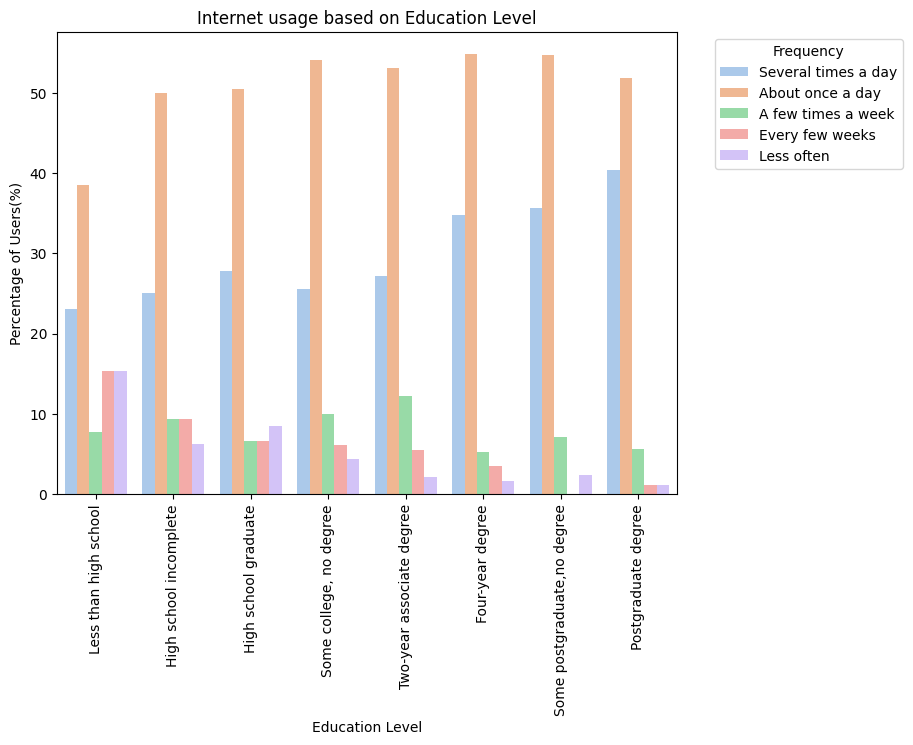

In [ ]:
data_internet_educ = data_survey[['respid', 'educ2', 'intfreq']].astype(str)
data_internet_educ.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data_internet_educ.dropna(inplace=True)
data_internet_educ = data_internet_educ[data_internet_educ['educ2'].isin(['1', '2', '3', '4', '5', '6', '7', '8'])]
data_internet_educ = data_internet_educ[data_internet_educ['intfreq'].isin(['1', '2', '3', '4', '5'])]
data_grouped_educ=data_internet_educ.groupby(['educ2', 'intfreq']).size().reset_index(name='value')
grouped=data_grouped_educ.groupby('educ2').agg(Total=('value', 'sum')).reset_index()
data_grouped_educ=data_grouped_educ.merge(grouped, on='educ2')
data_grouped_educ['Percentage']=(data_grouped_educ['value'] / data_grouped_educ['Total']) * 100

data_grouped_educ



labels = {
    '1': 'Several times a day',
    '2': 'About once a day',
    '3': 'A few times a week',
    '4': 'Every few weeks',
    '5': 'Less often'
}
education_labels = {
    '1': 'Less than high school',
    '2': 'High school incomplete',
    '3': 'High school graduate',
    '4': 'Some college, no degree',
    '5': 'Two-year associate degree',
    '6': 'Four-year degree',
    '7': 'Some postgraduate,no degree',
    '8': 'Postgraduate degree'
}
data_grouped_educ['educ2']=data_grouped_educ['educ2'].map(education_labels)

data_grouped_educ['Label']=data_grouped_educ['intfreq'].map(labels)
data_grouped_educ
plt.figure(figsize=(8, 6))

sns.barplot(x='educ2', y='Percentage', hue='Label', data=data_grouped_educ,palette='pastel')


plt.xlabel('Education Level' )
plt.ylabel('Percentage of Users(%)' )
plt.title('Internet usage based on Education Level' )
plt.xticks(rotation=90)


plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1))
plt.show()




#Impact of Social Media Usage on Book Reading Patterns Across Various Age Groups

The bar chart highlights the relationship between social media usage and book reading patterns across various age groups. A noticeable trend emerges, showing that individuals who do not use social media tend to read more books than those who do. This pattern is especially significant among the 18-24, 25-39, and 70+ age groups, where a clear difference in the number of books read is observed between social media users and non-users. Additionally, older age groups, particularly those 70 and above, tend to read more books than younger age groups.

The assumption behind this finding is that social media usage is consistent and not occasional or infrequent. These results suggest that increased social media usage might detract from time spent on traditional activities like reading. As younger generations spend more time on social media, they may read fewer books compared to older generations, who may have more time or inclination to engage with traditional forms of media. This insight provides valuable understanding of how modern technology influences reading habits

In [ ]:
import warnings
warnings.filterwarnings("ignore")

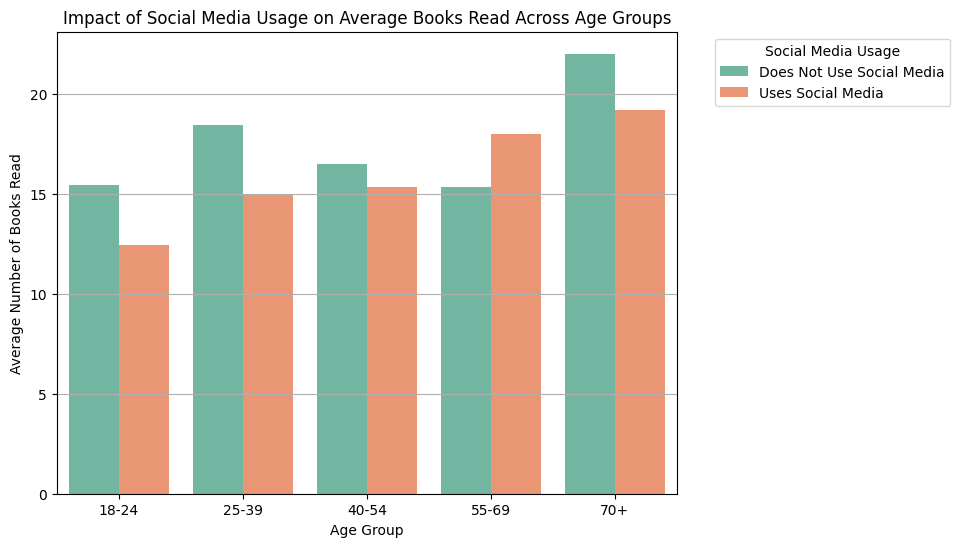

In [ ]:
data_internet_book = data_survey[['respid', 'books1', 'snsint2','age']]

age_bins = [18, 25, 40, 55, 70, 100]
age_labels = ['18-24', '25-39', '40-54', '55-69', '70+']
data_internet_book['age_label']= pd.cut(data_internet_book['age'].astype(int), bins=age_bins, labels=age_labels,right=False)

sns_labels = {1: 'Uses Social Media', 2: 'Does Not Use Social Media'}
data_internet_book['snsint2'] = data_internet_book['snsint2'].map(sns_labels)

data_internet_book = data_internet_book.groupby(['snsint2', 'age_label'])['books1'].mean().reset_index()
plt.figure(figsize=(8, 6))

sns.barplot(data=data_internet_book ,x='age_label', y='books1', hue='snsint2', palette='Set2')


plt.xlabel('Age Group' )
plt.ylabel('Average Number of Books Read' )
plt.title('Impact of Social Media Usage on Average Books Read Across Age Groups' )

plt.grid(axis='y')

plt.legend(title='Social Media Usage', bbox_to_anchor=(1.05, 1))

plt.show()
